# Módulo 1: Análisis de datos en el ecosistema Python

### Sesión (7)

# Regularización

Recordemos que la **regresión lineal múltiple** era un modelo que intentaba extraer una relación entre la variable objetivo y una serie de variables independientes que actuaban como los predictores del modelo, mediante **una ecuación lineal**.  

Existen en la práctica una serie de limitaciones comunes que uno se podría afrontar a la hora de ajustar este tipo de modelos como:  
- La presencia de **predictores correlacionadas**.  
- Incluir todas las variables independientes **sin realizar una selección** previa de predictores.  

Las técnicas de regularización como ***Ridge***, ***Lasso*** o ***Elastic Net*** intentan forzar a que los coeficientes del modelo tiendan a cero para:  
- Conseguir un modelo más **simple**, más generalizado y evitar el ***overfitting***.  
- Mitigar el efecto de la **correlación** entre los predictores.   

Volvemos a generar un modelo para predecir los precios de viviendas en Boston:

In [ ]:
# importamos las librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
# Modificamos los parámetros de los gráficos en matplotlib
from matplotlib.pyplot import rcParams

rcParams['figure.figsize'] = 12, 6 # el primer dígito es el ancho y el segundo el alto
rcParams["font.weight"] = "bold"
rcParams["font.size"] = 10
rcParams["axes.labelweight"] = "bold"

In [ ]:
# Importamos los datos de la misma librería de scikit-learn
from sklearn.datasets import load_boston
boston = load_boston()

# Convertir los datos en pandas dataframe
dataframe_x = pd.DataFrame(boston.data, columns = boston.feature_names)

# La variable dependiente es el target y la llamammos dataframe_y
dataframe_y = pd.DataFrame(boston.target, columns = ['target'])

# Combinamos ambos para obtener un dataframe con todas las variables explicativas y la variable objetivo
df_boston = dataframe_x.join(dataframe_y)

df_boston

c:\Users\wonderwoman\anaconda3\envs\recomendadorVideos\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


Características del conjunto de datos:

    -Número de muestras: 506

    -Número de atributos: 13 predictivo numérico / categórico

    -Median value (atributo 14) suele ser el objetivo.
    
Información de atributos (en orden):

        - CRIM tasa de delincuencia per cápita por ciudad
        - Proporción ZN de terreno residencial dividido en zonas para lotes de más de 25,000 pies cuadrados.
        - Proporción INDUS de acres comerciales no minoristas por ciudad
        - Variable ficticia CHAS Charles River (= 1 si el tramo limita con el río; 0 en caso contrario)
        - Concentración de óxidos nítricos NOX (partes por 10 millones)
        - RM número medio de habitaciones por vivienda
        - Proporción de EDAD de las unidades ocupadas por el propietario construidas antes de 1940
        - Distancias ponderadas DIS a cinco centros de empleo de Boston
        - Índice RAD de accesibilidad a carreteras radiales
        - IMPUESTO Tasa de impuesto a la propiedad de valor total por \$ 10,000\
        - PTRATIO Ratio maestro-alumno por municipio
        - B 1000 (Bk - 0.63) ^ 2 donde Bk es la proporción de negros por ciudad
        - LSTAT % menor estatus de la población
        - MEDV Valor medio de las viviendas ocupadas por el propietario en \$ 1000\

Definimos los datos del modelo con todas las variables de entrada **menos la variable éticamente incorrecta**


In [ ]:
X_multiple = df_boston.drop(['target', 'B'], axis='columns')
y_multiple = df_boston['target']

A pesar de que es una práctica común y recomendada, esta vez no modificamos la *[estructura de datos](https://scikit-learn.org/stable/glossary.html#term-array-like)* antes de pasarlo al modelo.

In [ ]:
X_multiple

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48


In [ ]:
y_multiple

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: target, Length: 506, dtype: float64

In [ ]:
# Dividir el dataset en Training y Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_multiple, y_multiple, test_size=0.2, random_state=124)

In [ ]:
from sklearn.linear_model import LinearRegression


lr_multiple = LinearRegression()

In [ ]:
# Entrenamos el modelo
lr_multiple.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Conseguir la predicción (para el conjunto de test que son los datos no vistos por el algoritmo en la fase de modelización)
y_pred_multiple = lr_multiple.predict(X_test)

In [ ]:
print('DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE')
print('\n', 'Valor de las pendientes o coeficientes "a":')
print(lr_multiple.coef_)
print('\n', 'Valor de la intersección o coeficiente "b":')
print(lr_multiple.intercept_)

DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE

 Valor de las pendientes o coeficientes "a":
[-1.31655093e-01  4.85176793e-02 -8.79855065e-03  2.83832241e+00
 -1.86314949e+01  3.82478607e+00  8.22246554e-03 -1.41509254e+00
  2.78510233e-01 -1.29899052e-02 -8.81718077e-01 -5.38203875e-01]

 Valor de la intersección o coeficiente "b":
39.05276989196378


In [ ]:
# Creamos una tabla de los parámetros del modelo ajustado
df_coef = pd.DataFrame(X_multiple.columns, columns=['variables'])
df_coef['coeficientes'] = lr_multiple.coef_
df_coef


,variables,coeficientes
0,CRIM,-0.131655
1,ZN,0.048518
2,INDUS,-0.008799
3,CHAS,2.838322
4,NOX,-18.631495
5,RM,3.824786
6,AGE,0.008222
7,DIS,-1.415093
8,RAD,0.278510
9,TAX,-0.012990


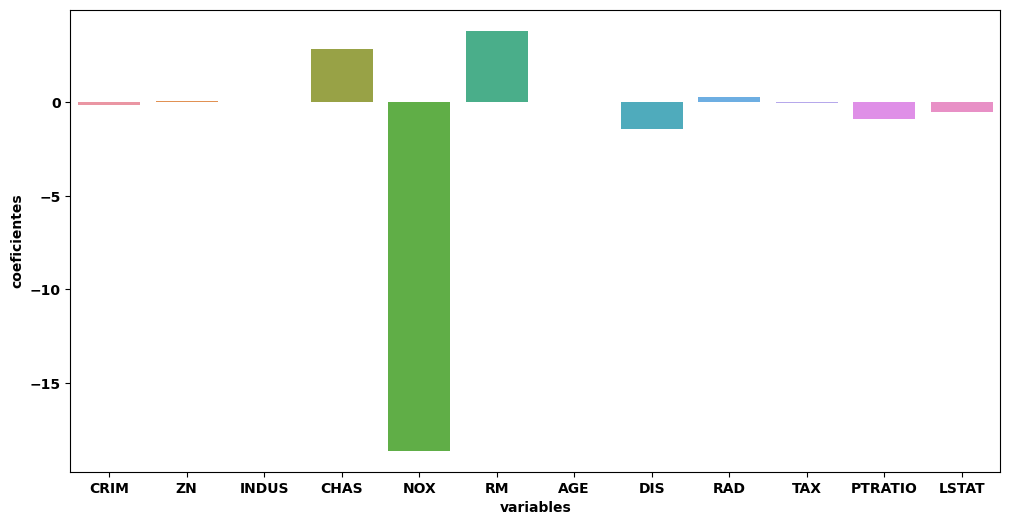

In [ ]:
# Visualizamos los coeficientes del modelo
sns.barplot(x=df_coef['variables'], y=df_coef['coeficientes'])
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Métricas para evaluar la calidad del modelo
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_multiple))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, y_pred_multiple)*100)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_multiple))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_multiple)))
print('R^2 coefficient of determination:', r2_score(y_test, y_pred_multiple))

Mean Absolute Error: 3.5154984449842726
Mean Absolute Percentage Error: 17.696060044730157
Mean Squared Error: 23.660632436308564
Root Mean Squared Error: 4.8642196122614125
R^2 coefficient of determination: 0.7242504521835383


## Ridge (L2)

En la ecuación genérica de un modelo de regresión lineal múltiple con ***`n`*** observaciones y ***`m`*** predictores, los coeficientes del modelo son los pesos que controlan la participación y por lo tanto la influencia de cada predictor en el modelo:

##### $y=b_{0} + b_{1}x_{1}+ b_{2}x_{2}+ b_{3}x_{3}+ ...+ b_{m}x_{m}$

El algoritmo por defecto busca cómo reducir la función de coste, que generalmente es el error cuadrático medio (*Mean Squared Error*) de las estimaciones en el conjunto de datos de entrenamiento (mínimos cuadrados):

![1_20m_U-H6EIcxlN2k07Z7oQ.png](attachment:1_20m_U-H6EIcxlN2k07Z7oQ.png)

La regularización **Ridge** conocida también como **L2**, penaliza la suma de los coeficientes del modelo al cuadrado. El principal efecto que causa el hecho de añadir este término a la función de coste del algoritmo es la **reducción proporcional del valor de todos los coeficientes** del modelo, sin que necesariamente lleguen a cero.  

El grado de penalización está controlado por el **hiperparámetro $\alpha$**.

![image.png](attachment:image.png)

A continuación aplicamos el método de ***Ridge Regression*** sobre el mismo planteamiento del dataset de Boston

In [ ]:
# importamos el "ridge regression" desde la misma librería de sklearn
from sklearn.linear_model import Ridge

# Entrenamos
L2_reg = Ridge(alpha = 1)
L2_reg.fit(X_train, y_train)
y_pred_l2 = L2_reg.predict(X_test)

In [ ]:
print('DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE')
print('\n', 'Valor de las pendientes o coeficientes "a":')
print(L2_reg.coef_)
print('\n', 'Valor de la intersección o coeficiente "b":')
print(L2_reg.intercept_)

DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE

 Valor de las pendientes o coeficientes "a":
[-1.29550834e-01  4.93742460e-02 -4.45704458e-02  2.61229578e+00
 -1.02647099e+01  3.88933083e+00  4.18189682e-04 -1.28972998e+00
  2.65107736e-01 -1.39717518e-02 -7.94003828e-01 -5.45184508e-01]

 Valor de la intersección o coeficiente "b":
33.45826197484366


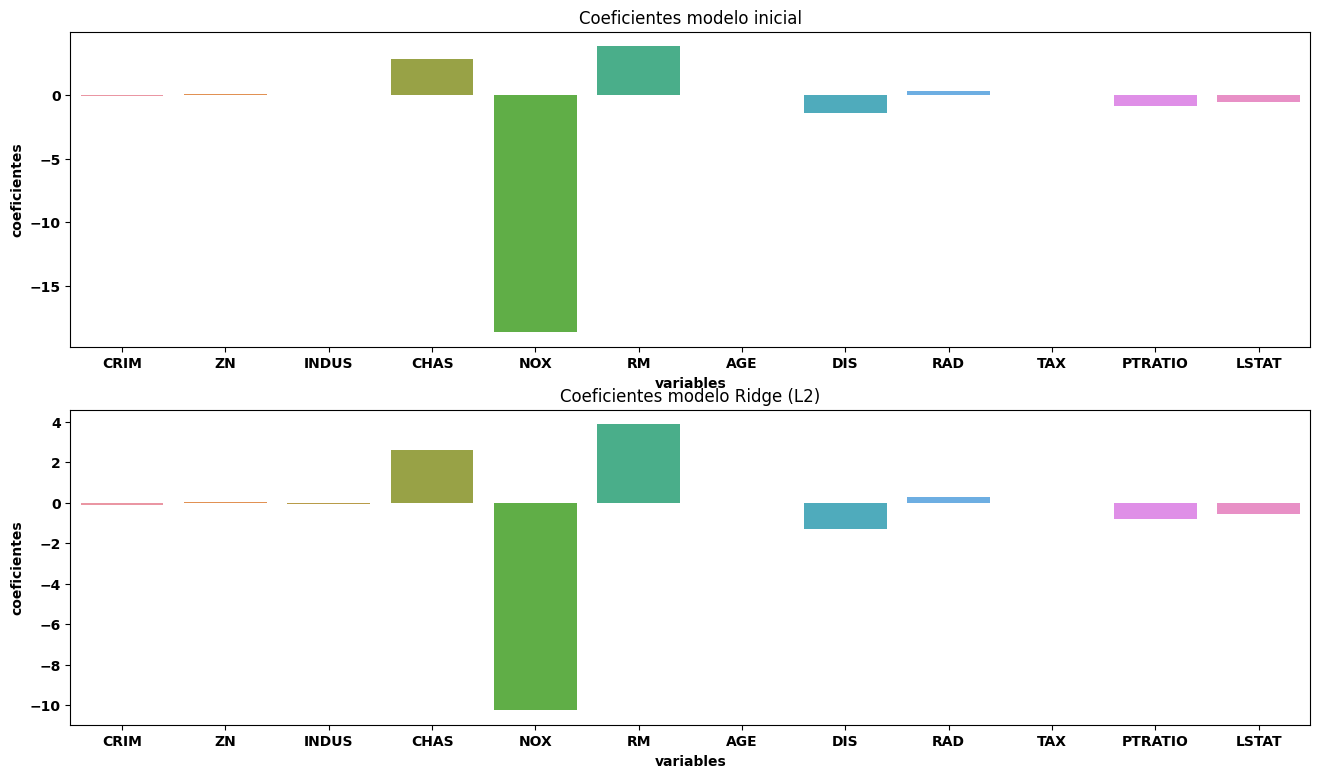

In [ ]:
# Visualizamos los coeficientes del modelo
df_coef_l2 = pd.DataFrame(X_multiple.columns, columns=['variables'])
df_coef_l2['coeficientes'] = L2_reg.coef_

fig, axes = plt.subplots(2, 1, figsize=(16,9))
sns.barplot(x=df_coef['variables'], y=df_coef['coeficientes'], ax=axes[0], )
axes[0].set_title("Coeficientes modelo inicial")

sns.barplot(x=df_coef_l2['variables'], y=df_coef_l2['coeficientes'], ax=axes[1])
axes[1].set_title("Coeficientes modelo Ridge (L2)")

plt.show()

Como se puede ver la diferencia principal del modelo *Ridge* está en contener coeficientes relativamente más pequeños que el modelo original.

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Métricas para evaluar la calidad del modelo
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_l2))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, y_pred_l2)*100)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_l2))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_l2)))
print('R^2 coefficient of determination:', r2_score(y_test, y_pred_l2))

Mean Absolute Error: 3.5078169459188624
Mean Absolute Percentage Error: 17.80918291018069
Mean Squared Error: 23.921178417320366
Mean Root Squared Error: 4.890928175440768
R^2 coefficient of determination: 0.7212139553087062


Las métricas del modelo indican que los resultados prácticamente son iguales que el modelo inicial.

## Lasso (L1)

La regularización **Lasso** conocida también como **L1**,pretende penalizar la suma del valor absolutos de los coeficientes del modelo. El efecto práctico que causa la inclusión de este término en la función de coste del algoritmo es que los coeficientes de los predictores tiendan a cero a medida de lo posible. De este modo *Lasso* consigue excluir las variables menos relevantes y dejar los predictores más importantes.  

Al igual que en el modelo *Ridge*, el grado de penalización está controlado por el **hiperparámetro $\alpha$**.

![image.png](attachment:image.png)

In [ ]:
# importamos "lasso (L1) regression" de la misma librería de sklearn
from sklearn.linear_model import Lasso

# Ajustamos el algoritmo
L1_reg = Lasso(alpha = 1)
L1_reg.fit(X_train, y_train)
y_pred_l1 = L1_reg.predict(X_test)

In [ ]:
print('DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE')
print('\n', 'Valor de las pendientes o coeficientes "a":')
print(L1_reg.coef_)
print('\n', 'Valor de la intersección o coeficiente "b":')
print(L1_reg.intercept_)

DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE

 Valor de las pendientes o coeficientes "a":
[-0.08422662  0.05332741 -0.          0.         -0.          0.91641177
  0.02752916 -0.58142827  0.27617053 -0.01796679 -0.65064986 -0.78534121]

 Valor de la intersección o coeficiente "b":
43.32129789105643


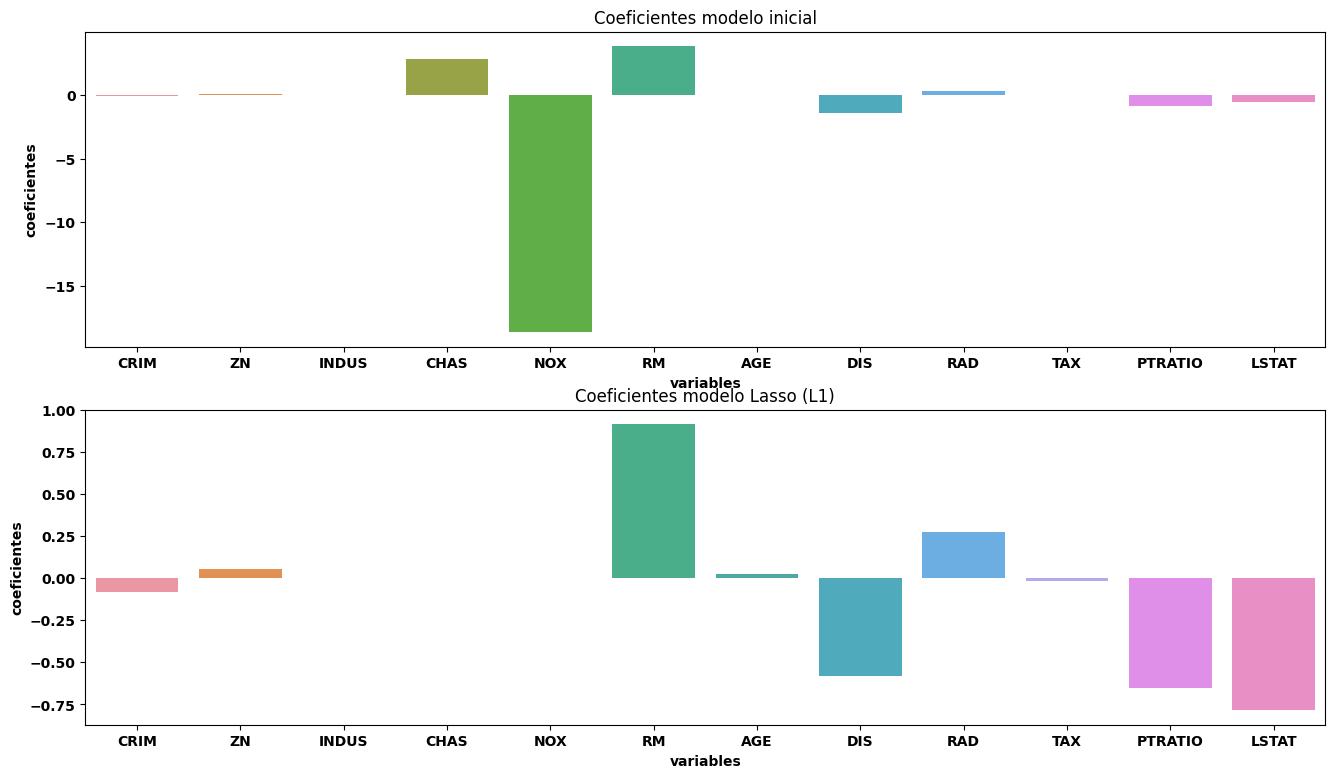

In [ ]:
# Visualizamos los coeficientes del modelo
df_coef_l1 = pd.DataFrame(X_multiple.columns, columns=['variables'])
df_coef_l1['coeficientes'] = L1_reg.coef_

fig, axes = plt.subplots(2, 1, figsize=(16,9))
sns.barplot(x=df_coef['variables'], y=df_coef['coeficientes'], ax=axes[0], )
axes[0].set_title("Coeficientes modelo inicial")

sns.barplot(x=df_coef_l1['variables'], y=df_coef_l1['coeficientes'], ax=axes[1])
axes[1].set_title("Coeficientes modelo Lasso (L1)")
plt.show()

In [ ]:
df_coef_l1

,variables,coeficientes
0,CRIM,-0.084227
1,ZN,0.053327
2,INDUS,-0.000000
3,CHAS,0.000000
4,NOX,-0.000000
5,RM,0.916412
6,AGE,0.027529
7,DIS,-0.581428
8,RAD,0.276171
9,TAX,-0.017967


Como se puede observar, el modelo *Lasso* ha excluido un par de predictores (al menos 3 variables) respecto al modelo de regresión lineal original.

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Métricas para evaluar la calidad del modelo
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_l1))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, y_pred_l1)*100)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_l1))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_l1)))
print('R^2 coefficient of determination:', r2_score(y_test, y_pred_l1))

Mean Absolute Error: 3.6956062662932743
Mean Absolute Percentage Error: 17.959230482832364
Mean Squared Error: 28.29129002515334
Mean Root Squared Error: 5.318955726940518
R^2 coefficient of determination: 0.6702830977751526


Los resultados del modelo quizá se pueden considerar ligeramente peores peores que el modelo original, pero seguramente ganamos mucho teniendo un modelo **más simple y más generalizable** que el modelo inicial.  

## Elastic Net


El modelo **Elastic Net** consiste en una regularización que combina las penalizaciones de *L1 (Lasso)* y *L2 (Ridge)*.  
El grado de regularización en general se controla por el **hiperparámetro $\alpha$**.  
El grado en que influye cada una de las penalizaciones está controlado por el **hiperparámetro $l1_{ratio}$**.  

Cuando $l1_{ratio}=1$ se aplica el modelo *Lasso* y cuando $l1_{ratio}=0$ se implementa la regularización *Ridge*.  

![image.png](attachment:image.png)

In [ ]:
# importamos "Elastic Net regression" de la misma librería de sklearn
from sklearn.linear_model import ElasticNet

# Ajustamos el algoritmo indicando unos valoros para los hiperparámetros
Elastic_reg = ElasticNet(alpha=1, l1_ratio=0.8)
Elastic_reg.fit(X_train, y_train)
y_pred_elastic = Elastic_reg.predict(X_test)

In [ ]:
print('DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE')
print('\n', 'Valor de las pendientes o coeficientes "a":')
print(Elastic_reg.coef_)
print('\n', 'Valor de la intersección o coeficiente "b":')
print(Elastic_reg.intercept_)

DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE

 Valor de las pendientes o coeficientes "a":
[-0.09333698  0.05535578 -0.00459708  0.         -0.          0.91666112
  0.02662239 -0.63312253  0.29208419 -0.01850576 -0.66287993 -0.78284766]

 Valor de la intersección o coeficiente "b":
43.90079168528231


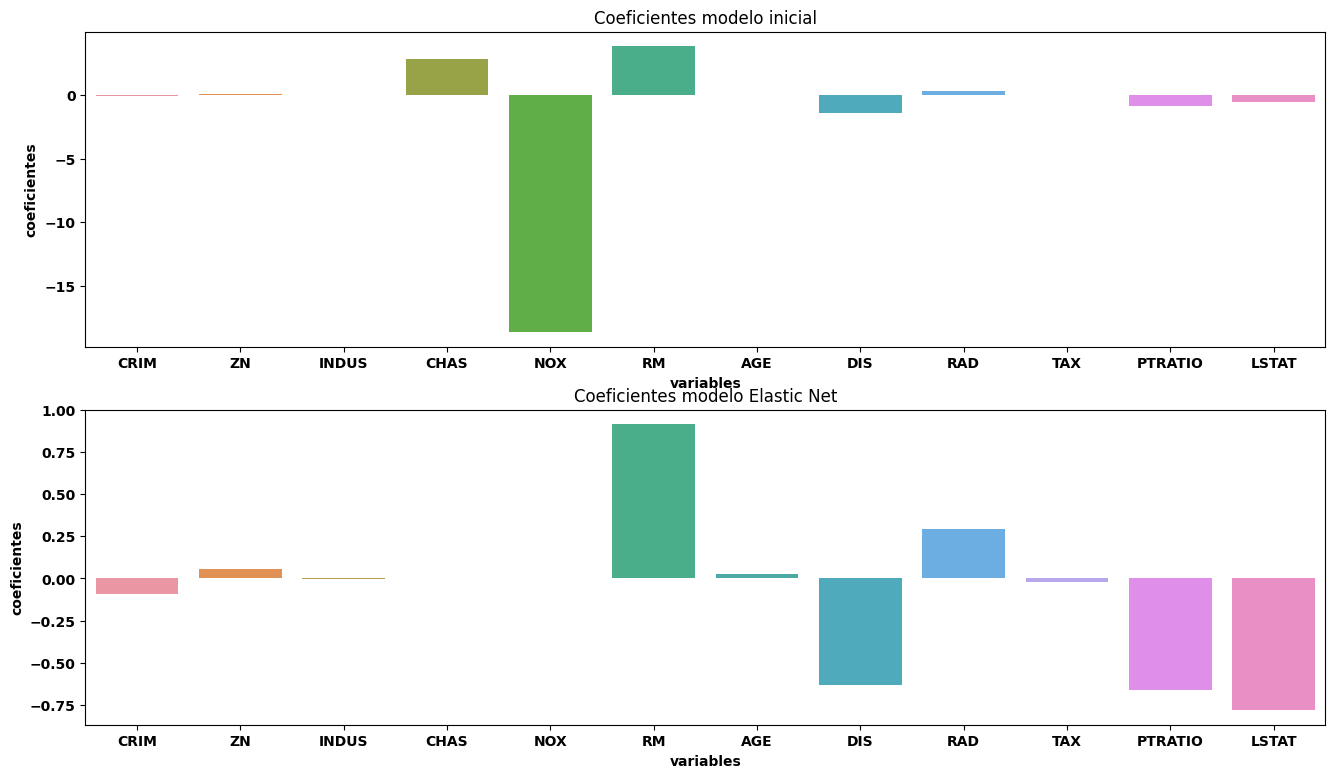

In [ ]:
# Visualizamos los coeficientes del modelo
df_coef_elastic = pd.DataFrame(X_multiple.columns, columns=['variables'])
df_coef_elastic['coeficientes'] = Elastic_reg.coef_

fig, axes = plt.subplots(2, 1, figsize=(16,9))
sns.barplot(x=df_coef['variables'], y=df_coef['coeficientes'], ax=axes[0], )
axes[0].set_title("Coeficientes modelo inicial")

sns.barplot(x=df_coef_elastic['variables'], y=df_coef_elastic['coeficientes'], ax=axes[1])
axes[1].set_title("Coeficientes modelo Elastic Net")
plt.show()

Se aprecia que se han excluido al menos 2 variables respecto al modelo original. Los coeficientes son similares a los coeficientes del modelo *Lasso* posiblemente por su mayor porcentaje de participación en la regularización.

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Métricas para evaluar la calidad del modelo
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_elastic))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, y_pred_elastic)*100)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_elastic))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_elastic)))
print('R^2 coefficient of determination:', r2_score(y_test, y_pred_elastic))

Mean Absolute Error: 3.683205181940034
Mean Absolute Percentage Error: 17.944172818954225
Mean Squared Error: 28.13174670079791
Mean Root Squared Error: 5.303936905808544
R^2 coefficient of determination: 0.6721424732447885


Los resultados de este modelo es muy similar al modelo anterior que se generó aplicando una regularización *Lasso*.

In [ ]:
df_coef_elastic

,variables,coeficientes
0,CRIM,-0.093337
1,ZN,0.055356
2,INDUS,-0.004597
3,CHAS,0.000000
4,NOX,-0.000000
5,RM,0.916661
6,AGE,0.026622
7,DIS,-0.633123
8,RAD,0.292084
9,TAX,-0.018506


### Elastic Net - Optimización de hiperparámetros

El mejor modelo en caso de la regularización Elastic Net se consigue mediante los **valores óptimos de los hiperparámetros** ($\alpha$ y $l1_{ratio}$).

Estos dos valores como se tratan de los hiperparámetros del modelo, no tienen una estimación previa o un cálculo directo que se pueda aplicar a los datos del modelo. Una forma de obtener los hiperparámetros óptimos consiste en aplicar la técnica de **Cross-Validation (validación cruzada)**.  
En la librería scikit-learn podemos usar la función **ElasticNetCV** que nos permite buscar dentro de un rango determinado para encontrar los valores óptimos en base a los errores obtenidos dentro del conjunto de entrenamiento.

![image.png](attachment:image.png)

In [ ]:
# importamos "ElasticNetCV regression"
from sklearn.linear_model import ElasticNetCV

# Train the model
Elastic_reg_cv = ElasticNetCV(alphas=np.arange(0.6, 5, 0.01),
                              l1_ratio=[.1, .5, .7, .9, .95, .99, 1],
                              cv=10,
                              random_state=123)
Elastic_reg_cv.fit(X_train, y_train)
y_pred_elastic_cv = Elastic_reg_cv.predict(X_test)

In [ ]:
# Podemos consultar los valores considerados como alpha en la búsqueda
Elastic_reg_cv.alphas_

array([4.99, 4.98, 4.97, 4.96, 4.95, 4.94, 4.93, 4.92, 4.91, 4.9 , 4.89,
       4.88, 4.87, 4.86, 4.85, 4.84, 4.83, 4.82, 4.81, 4.8 , 4.79, 4.78,
       4.77, 4.76, 4.75, 4.74, 4.73, 4.72, 4.71, 4.7 , 4.69, 4.68, 4.67,
       4.66, 4.65, 4.64, 4.63, 4.62, 4.61, 4.6 , 4.59, 4.58, 4.57, 4.56,
       4.55, 4.54, 4.53, 4.52, 4.51, 4.5 , 4.49, 4.48, 4.47, 4.46, 4.45,
       4.44, 4.43, 4.42, 4.41, 4.4 , 4.39, 4.38, 4.37, 4.36, 4.35, 4.34,
       4.33, 4.32, 4.31, 4.3 , 4.29, 4.28, 4.27, 4.26, 4.25, 4.24, 4.23,
       4.22, 4.21, 4.2 , 4.19, 4.18, 4.17, 4.16, 4.15, 4.14, 4.13, 4.12,
       4.11, 4.1 , 4.09, 4.08, 4.07, 4.06, 4.05, 4.04, 4.03, 4.02, 4.01,
       4.  , 3.99, 3.98, 3.97, 3.96, 3.95, 3.94, 3.93, 3.92, 3.91, 3.9 ,
       3.89, 3.88, 3.87, 3.86, 3.85, 3.84, 3.83, 3.82, 3.81, 3.8 , 3.79,
       3.78, 3.77, 3.76, 3.75, 3.74, 3.73, 3.72, 3.71, 3.7 , 3.69, 3.68,
       3.67, 3.66, 3.65, 3.64, 3.63, 3.62, 3.61, 3.6 , 3.59, 3.58, 3.57,
       3.56, 3.55, 3.54, 3.53, 3.52, 3.51, 3.5 , 3.

In [ ]:
# Consultamos el valor óptimo seleccionado para "alpha"
Elastic_reg_cv.alpha_


0.6

In [ ]:
# Podemos consultar los valores considerados como "l1_ratio"
Elastic_reg_cv.l1_ratio

[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]

In [ ]:
# Consultamos el valor óptimo seleccionado para "l1_ratio"
Elastic_reg_cv.l1_ratio_

1.0

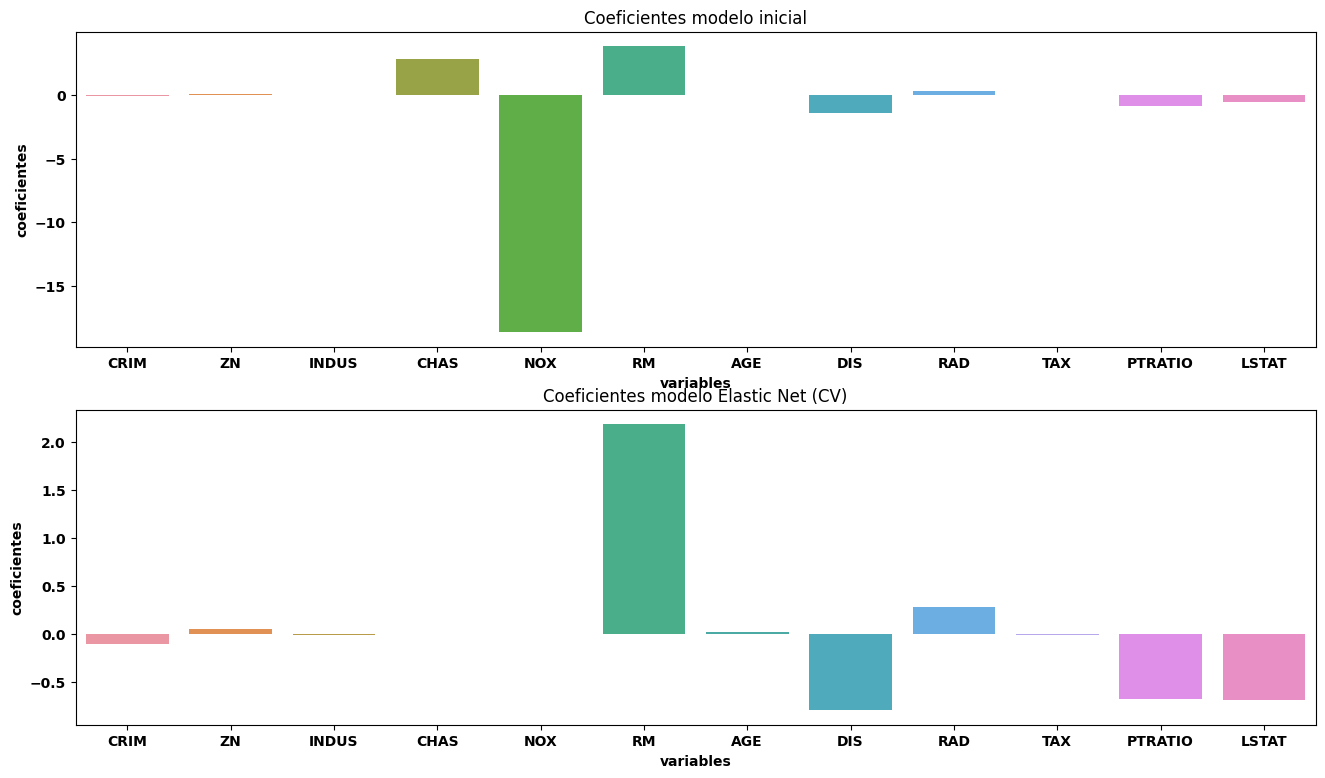

In [ ]:
# Visualizamos los coeficientes del modelo
df_coef_elastic_cv = pd.DataFrame(X_multiple.columns, columns=['variables'])
df_coef_elastic_cv['coeficientes'] = Elastic_reg_cv.coef_

fig, axes = plt.subplots(2, 1, figsize=(16,9))
sns.barplot(x=df_coef['variables'], y=df_coef['coeficientes'], ax=axes[0], )
axes[0].set_title("Coeficientes modelo inicial")

sns.barplot(x=df_coef_elastic_cv['variables'], y=df_coef_elastic_cv['coeficientes'], ax=axes[1])
axes[1].set_title("Coeficientes modelo Elastic Net (CV)")
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Métricas para evaluar la calidad del modelo
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_elastic_cv))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, y_pred_elastic_cv)*100)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_elastic_cv))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_elastic_cv)))
print('R^2 coefficient of determination:', r2_score(y_test, y_pred_elastic_cv))

Mean Absolute Error: 3.6003375238773834
Mean Absolute Percentage Error: 17.99730220356714
Mean Squared Error: 26.093154916147842
Mean Root Squared Error: 5.108145937240619
R^2 coefficient of determination: 0.695900957482808


Se ven que los resulados obtenidos con la búsqueda a través de la CV (validación-cruzada) son **ligeramente mejores** que modelo anterior.

---

In [ ]:
top4=abs(df_coef_elastic['coeficientes']).nlargest(4)
top4

5     0.916661
11    0.782848
10    0.662880
7     0.633123
Name: coeficientes, dtype: float64

In [ ]:
x=df_coef_elastic.loc[abs(df_coef_elastic['coeficientes']).isin(top4),'variables'].values
x

array(['RM', 'DIS', 'PTRATIO', 'LSTAT'], dtype=object)

### **`Ejercicio 7.1`**

Selecciona las 4 variables más importantes según éste último modelo generado con el método `ElasticNetCV` y:  

**`7.1.1`** Construye un modelo tipo regresión lineal múltiple con estos 4 predictores.  
**`7.1.2`** Visualiza los coeficientes del modelo y comparalo con los coeficientes correspondientes al modelo original (primer modelo).  
**`7.1.3`** Calcula diferentes métricas para evaluar tu modelo y analiza su rendimiendo en comparación con modelos anteriores.
- MAE
- MAPE
- MSE
- RMSE
- $R^2$  
  
Explica si este modelo tiene preferencia o no, para ser elegido en práctica como predictor de precio de viviendas comparando con otros modelos.

In [ ]:
## Solución
# Ejercicio 7.1.1
#Creamos el dataframe con los nombres del df de boston y asignamos el nombre de las columnas a "variables"
df_coef = pd.DataFrame(X_multiple.columns, columns=['variables'])
#Añadimos al df_coef la columna "coeficientes" y asignamos los coeficeintes como valores
df_coef['coeficientes'] = lr_multiple.coef_
#Obtenemos las variables mas grandes usando el metodo abs(obtiene valores absolutos) y nlargest(calcula el valor mayor)
top4=abs(df_coef_elastic['coeficientes']).nlargest(4)
#Creamos un array con la lista de nombres de los 4 valores mas grandes
x=df_coef_elastic.loc[abs(df_coef_elastic['coeficientes']).isin(top4),'variables'].values
# las variables mas importantes son: RM, DIS, PTRATIO, LSTAT. ya que son las que nos dan valores mas grandes
modelo_x=df_boston[x]
modelo_y=df_boston["target"]
#Hacemos la division de el Dataframe
X_train71,X_test71,Y_train71,Y_test71=train_test_split(modelo_x,modelo_y,test_size=0.2 ,random_state=124)
#Entrenamos al modelo
from tkinter import Y
lr_multi_72=LinearRegression()
lr_multi_72.fit(X_train71,Y_train71)
y_pred_72=lr_multi_72.predict(X_test71)


DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE TOP 4

 Valor de las pendientes o coeficientes "a":
[ 4.49383187 -0.46562245 -0.96425507 -0.64947271]


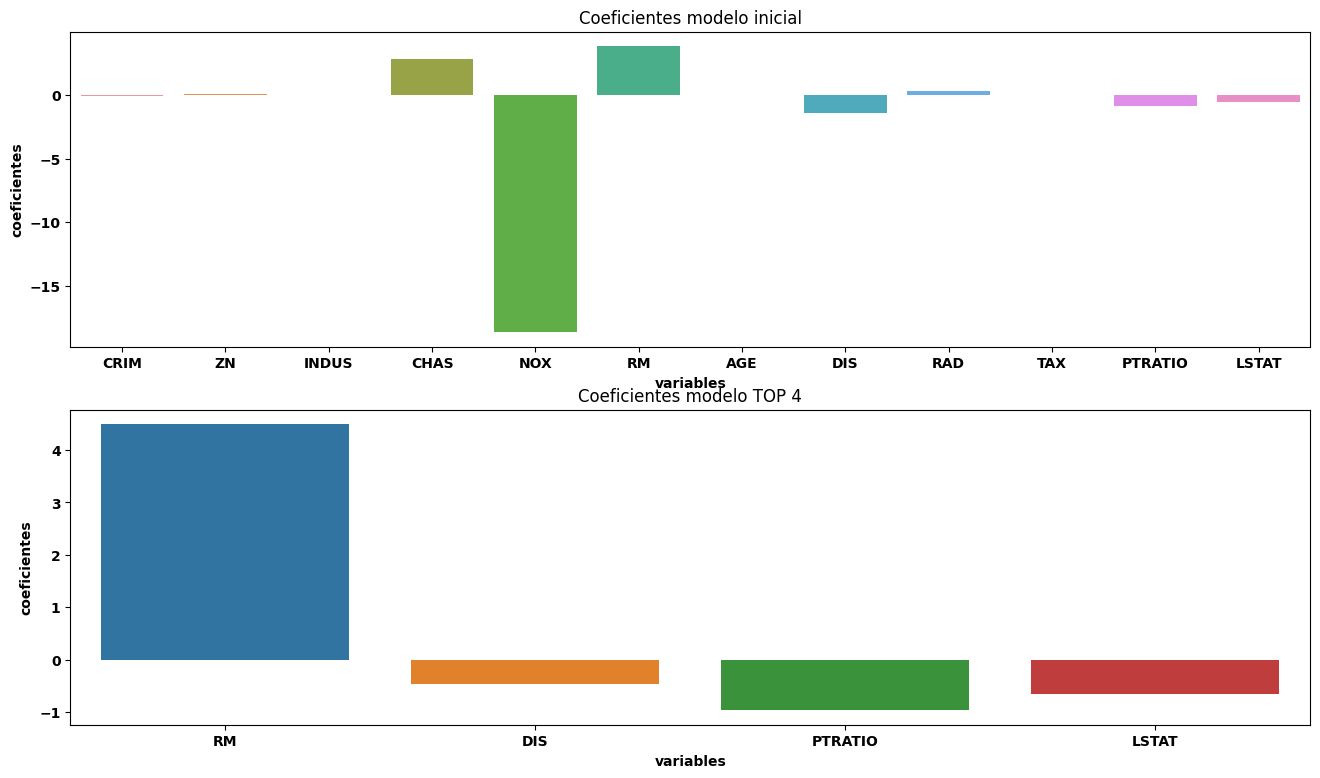

In [ ]:
## Solución
# Ejercicio 7.1.2
print('DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE TOP 4')
print('\n', 'Valor de las pendientes o coeficientes "a":')
print(lr_multi_72.coef_)
# Visualizamos los coeficientes del modelo
TOP4 = pd.DataFrame(modelo_x.columns, columns=['variables'])
TOP4['coeficientes'] = lr_multi_72.coef_
fig, axes = plt.subplots(2, 1, figsize=(16,9))
sns.barplot(x=df_coef['variables'], y=df_coef['coeficientes'], ax=axes[0], )
axes[0].set_title("Coeficientes modelo inicial")
sns.barplot(x=TOP4['variables'], y=TOP4['coeficientes'], ax=axes[1])
axes[1].set_title("Coeficientes modelo TOP 4")
plt.show()

In [ ]:
## Solución
# Ejercicio 7.1.3
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Métricas para evaluar la calidad del modelo ELASTICNETCV
print('METRICAS DEL MODELO ELASTICNETCV')
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_elastic_cv))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, y_pred_elastic_cv)*100)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_elastic_cv))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_elastic_cv)))
print('R^2 coefficient of determination:', r2_score(y_test, y_pred_elastic_cv))

#Metricas para evaluar la calidad del modelo TOP 4
print('\nMETRICAS DEL MODELO TOP 4')
print('Mean Absolute Error:', mean_absolute_error(Y_test71, y_pred_72))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(Y_test71, y_pred_72)*100)
print('Mean Squared Error:', mean_squared_error(Y_test71, y_pred_72))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(Y_test71, y_pred_72)))
print('R^2 coefficient of determination:', r2_score(Y_test71, y_pred_72))

'Como podemos observar en la comparacion tanto como en la visualizacion como en las metricas,son casi iguales,excepto en la metrica MAPE,que hay una diferencia de 2 puntos,con lo que no prodiamos decir que este modelo no tiene preferencia frente a otros modelos'

METRICAS DEL MODELO ELASTICNETCV
Mean Absolute Error: 3.6003375238773834
Mean Absolute Percentage Error: 17.99730220356714
Mean Squared Error: 26.093154916147842
Mean Root Squared Error: 5.108145937240619
R^2 coefficient of determination: 0.695900957482808

METRICAS DEL MODELO TOP 4
Mean Absolute Error: 3.6816841287925444
Mean Absolute Percentage Error: 19.729282464193552
Mean Squared Error: 26.53467167177884
Mean Root Squared Error: 5.151181580159919
R^2 coefficient of determination: 0.6907553619013556


'Como podemos observar en la comparacion tanto como en la visualizacion como en las metricas,son casi iguales,excepto en la metrica MAPE,que hay una diferencia de 2 puntos,con lo que no prodiamos decir que este modelo no tiene preferencia frente a otros modelos'

---

Ahora intentamos aplicar diferentes métodos de regresión lineal con la regularización de los coeficientes de regresión sobre el [Fisher’s Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set)

![image.png](attachment:image.png)

* El conjunto de datos de flores de Iris  es un conjunto de datos multivariante introducido por el estadístico y biólogo británico **Ronald Fisher**
* El conjunto de datos consta de **50 muestras** de cada una de **las tres especies de Iris**:
    * Iris **setosa**
    * Iris **virginica**
    * Iris **versicolor**
* Se midieron cuatro características de cada muestra:
    * el **largo** de los **sépalos**, en centímetros.
    * el **ancho** de los **sépalos**, en centímetros.
    * el **largo** de los **pétalos**, en centímetros.
    * el **ancho** de los **pétalos**, en centímetros.
* Basado en la combinación de estas cuatro características, Fisher desarrolló un modelo discriminante lineal para **distinguir las especies** entre sí.    

In [ ]:
from sklearn.datasets import load_iris


# Construimos un dataframe con los datos medidos
dataset = pd.DataFrame(load_iris()["data"],columns=load_iris()["feature_names"])

# Añadimos la especie como etiqueta
dataset["label"] = load_iris()["target_names"][load_iris()["target"]]

dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
# Quedarnos solamente con las columnas numéricas
dataset_num = dataset.drop('label', axis=1)
dataset_num

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### **Planteamiento del problema**: predecir la longitud del sépalo (cm) de las flores iris

Estableceremos las **longitudes de los sépalos** como la variable ***y_iris*** (variable objetivo) y el resto de las variables como predictores del modelo  ***X_iris*** (variables independientes).

In [ ]:
X_iris = dataset_num.drop('sepal length (cm)', axis='columns')
y_iris = dataset_num['sepal length (cm)']

print(X_iris)
print(y_iris)

     sepal width (cm)  petal length (cm)  petal width (cm)
0                 3.5                1.4               0.2
1                 3.0                1.4               0.2
2                 3.2                1.3               0.2
3                 3.1                1.5               0.2
4                 3.6                1.4               0.2
..                ...                ...               ...
145               3.0                5.2               2.3
146               2.5                5.0               1.9
147               3.0                5.2               2.0
148               3.4                5.4               2.3
149               3.0                5.1               1.8

[150 rows x 3 columns]
0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal length (cm), Length: 150, dtype: float64


In [ ]:
# Separar los conjuntos de datos de entrenamiento (Training) y de prueba (Test) para las variables de entrada y salida
from sklearn.model_selection import train_test_split
X_train_ir, X_test_ir, y_train_ir, y_test_ir = train_test_split(X_iris, y_iris, test_size= 0.25, random_state= 123)

In [ ]:
# Indicamos el algoritmo de "regresión linel"

from sklearn.linear_model import LinearRegression

lr_iris = LinearRegression()

In [ ]:
# Training/Fitting para entrenar el modelo
lr_iris.fit(X_train_ir, y_train_ir)

LinearRegression()

In [ ]:
# Conseguir la predicción (para el conjunto de test que son los datos no vistos por el algoritmo en la fase de modelización)
y_pred_ir = lr_iris.predict(X_test_ir)

In [ ]:
print('DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE')
print('\n', 'Valor de las pendientes o coeficientes "a":')
print(lr_iris.coef_)
print('\n', 'Valor de la intersección o coeficiente "b":')
print(lr_iris.intercept_)

DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE

 Valor de las pendientes o coeficientes "a":
[ 0.65464427  0.73050862 -0.62879772]

 Valor de la intersección o coeficiente "b":
1.8517174253895137


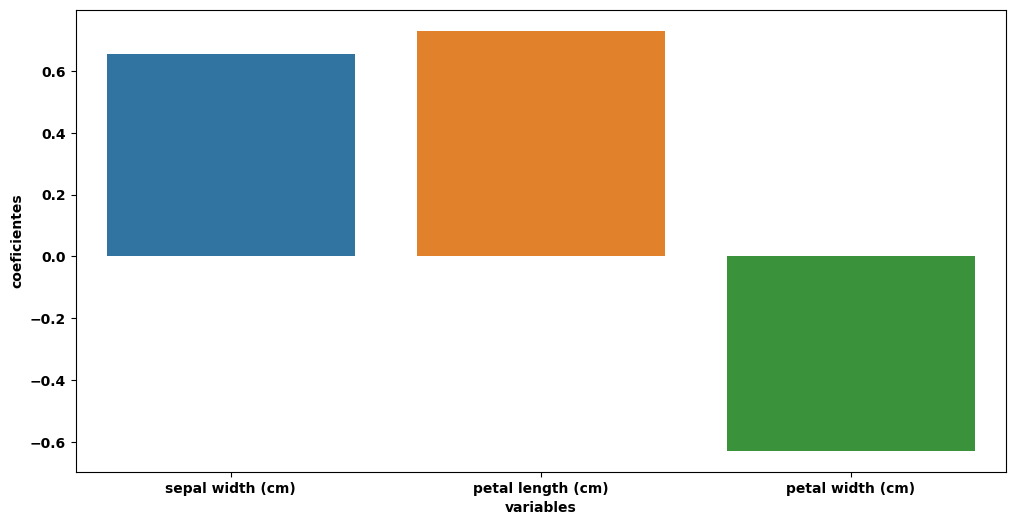

In [ ]:
# Creamos una tabla de los parámetros del modelo ajustado y los visualizamos
df_coef_ir = pd.DataFrame(X_iris.columns, columns=['variables'])
df_coef_ir['coeficientes'] = lr_iris.coef_

sns.barplot(x=df_coef_ir['variables'], y=df_coef_ir['coeficientes'])
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Métricas para evaluar la calidad del modelo
print('Mean Absolute Error:', mean_absolute_error(y_test_ir, y_pred_ir))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test_ir, y_pred_ir)*100)
print('Mean Squared Error:', mean_squared_error(y_test_ir, y_pred_ir))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test_ir, y_pred_ir)))
print('R^2 coefficient of determination:', r2_score(y_test_ir, y_pred_ir))

Mean Absolute Error: 0.28285419571828097
Mean Absolute Percentage Error: 4.941203228291839
Mean Squared Error: 0.11930339817249105
Mean Root Squared Error: 0.345403239956563
R^2 coefficient of determination: 0.8616861039388235


Como primera regularización aplicamos el modelo **Lasso (L1)**

In [ ]:
# importamos "lasso (L1) regression" de la misma librería de sklearn
from sklearn.linear_model import Lasso

# Ajustamos el modelo
L1_reg_ir = Lasso(alpha = 1)
L1_reg_ir.fit(X_train_ir, y_train_ir)
y_pred_l1_ir = L1_reg_ir.predict(X_test_ir)

In [ ]:
print('DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE')
print('\n', 'Valor de las pendientes o coeficientes "a":')
print(L1_reg_ir.coef_)
print('\n', 'Valor de la intersección o coeficiente "b":')
print(L1_reg_ir.intercept_)

DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE

 Valor de las pendientes o coeficientes "a":
[-0.          0.05709709  0.        ]

 Valor de la intersección o coeficiente "b":
5.645583477117784


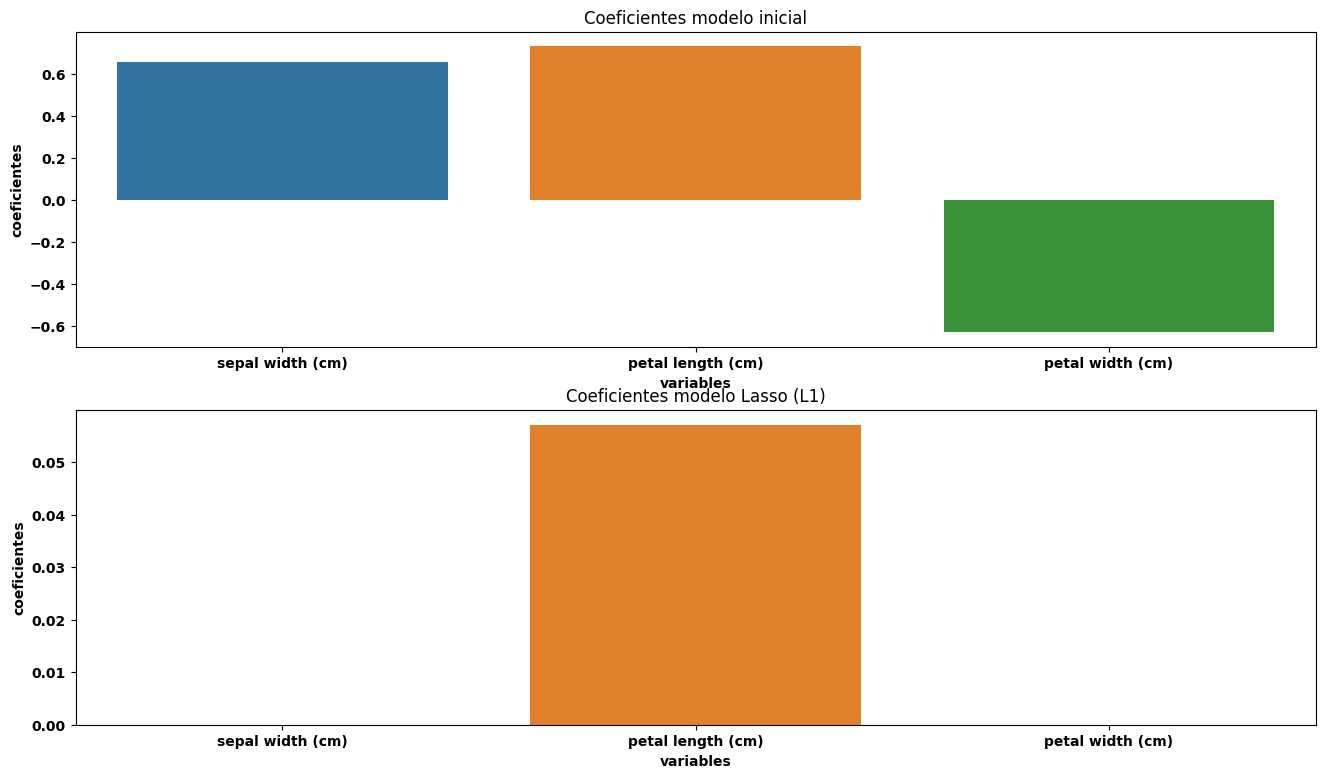

In [ ]:
# Visualizamos los coeficientes del modelo
df_coef_l1_ir = pd.DataFrame(X_iris.columns, columns=['variables'])
df_coef_l1_ir['coeficientes'] = L1_reg_ir.coef_

fig, axes = plt.subplots(2, 1, figsize=(16,9))
sns.barplot(x=df_coef_ir['variables'], y=df_coef_ir['coeficientes'], ax=axes[0])
axes[0].set_title("Coeficientes modelo inicial")

sns.barplot(x=df_coef_l1_ir['variables'], y=df_coef_l1_ir['coeficientes'], ax=axes[1])
axes[1].set_title("Coeficientes modelo Lasso (L1)")
plt.show()

Como se puede observar, el modelo *Lasso* ha dejado solamente una variable como predictor.

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Métricas para evaluar la calidad del modelo
print('Mean Absolute Error:', mean_absolute_error(y_test_ir, y_pred_l1_ir))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test_ir, y_pred_l1_ir)*100)
print('Mean Squared Error:', mean_squared_error(y_test_ir, y_pred_l1_ir))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test_ir, y_pred_l1_ir)))
print('R^2 coefficient of determination:', r2_score(y_test_ir, y_pred_l1_ir))

Mean Absolute Error: 0.6849294562362616
Mean Absolute Percentage Error: 12.09618277305041
Mean Squared Error: 0.7026378774991608
Mean Root Squared Error: 0.8382349774968597
R^2 coefficient of determination: 0.18539971328768612


El rendimiento de este modelo claramente es inferior y no tiene mucha capacidad predictiva por los resultados obtenidos.

Ahora aplicamos el método de ***Ridge Regression*** sobre el mismo planteamiento del dataset de Iris:

In [ ]:
# importamos el "ridge regression"
from sklearn.linear_model import Ridge

# Entrenamos el modelo L2
L2_reg_ir = Ridge(alpha = 1)
L2_reg_ir.fit(X_train_ir, y_train_ir)
y_pred_l2_ir = L2_reg_ir.predict(X_test_ir)

In [ ]:
print('DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE')
print('\n', 'Valor de las pendientes o coeficientes "a":')
print(L2_reg_ir.coef_)
print('\n', 'Valor de la intersección o coeficiente "b":')
print(L2_reg_ir.intercept_)

DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE

 Valor de las pendientes o coeficientes "a":
[ 0.58942098  0.64936485 -0.45491125]

 Valor de la intersección o coeficiente "b":
2.1457688792934153


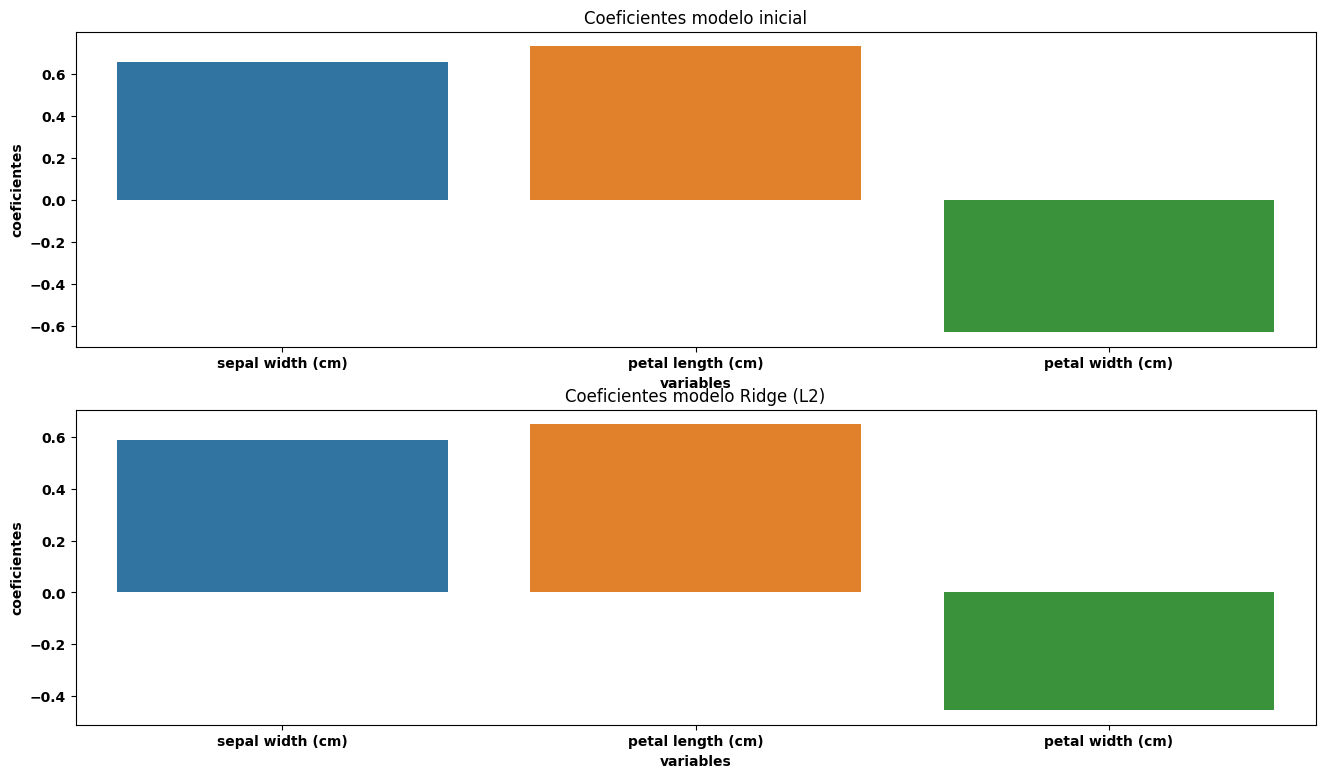

In [ ]:
# Visualizamos los coeficientes del modelo
df_coef_l2_ir = pd.DataFrame(X_iris.columns, columns=['variables'])
df_coef_l2_ir['coeficientes'] = L2_reg_ir.coef_

fig, axes = plt.subplots(2, 1, figsize=(16,9))
sns.barplot(x=df_coef_ir['variables'], y=df_coef_ir['coeficientes'], ax=axes[0])
axes[0].set_title("Coeficientes modelo inicial")

sns.barplot(x=df_coef_l2_ir['variables'], y=df_coef_l2_ir['coeficientes'], ax=axes[1])
axes[1].set_title("Coeficientes modelo Ridge (L2)")
plt.show()

El modelo de L2 incluye las 3 variables independientes como el modelo original, con los coeficientes similares y ligeramente más pequeños.

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Métricas para evaluar la calidad del modelo
print('Mean Absolute Error:', mean_absolute_error(y_test_ir, y_pred_l2_ir))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test_ir, y_pred_l2_ir)*100)
print('Mean Squared Error:', mean_squared_error(y_test_ir, y_pred_l2_ir))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test_ir, y_pred_l2_ir)))
print('R^2 coefficient of determination:', r2_score(y_test_ir, y_pred_l2_ir))

Mean Absolute Error: 0.28388765658567483
Mean Absolute Percentage Error: 4.9645443573366626
Mean Squared Error: 0.1177109399155002
Mean Root Squared Error: 0.34309027954096893
R^2 coefficient of determination: 0.8635323137636329


Las métricas del modelo indican que los resultados prácticamente son iguales que el modelo original sin regularización.

Ahora aplicamos el modelo **Elastic Net** que pretende combinar las dos penalizaciones anteriores:

In [ ]:
# importamos "Elastic Net regression"
from sklearn.linear_model import ElasticNet

# Ajustamos el algoritmo indicando unos valoros para los hiperparámetros
Elastic_reg_ir = ElasticNet(alpha=0.1,l1_ratio=0.5)
Elastic_reg_ir.fit(X_train_ir, y_train_ir)
y_pred_elastic_ir = Elastic_reg_ir.predict(X_test_ir)

In [ ]:
print('DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE')
print('\n', 'Valor de las pendientes o coeficientes "a":')
print(Elastic_reg_ir.coef_)
print('\n', 'Valor de la intersección o coeficiente "b":')
print(Elastic_reg_ir.intercept_)

DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE

 Valor de las pendientes o coeficientes "a":
[0.12055477 0.38878762 0.        ]

 Valor de la intersección o coeficiente "b":
4.0080440837722815


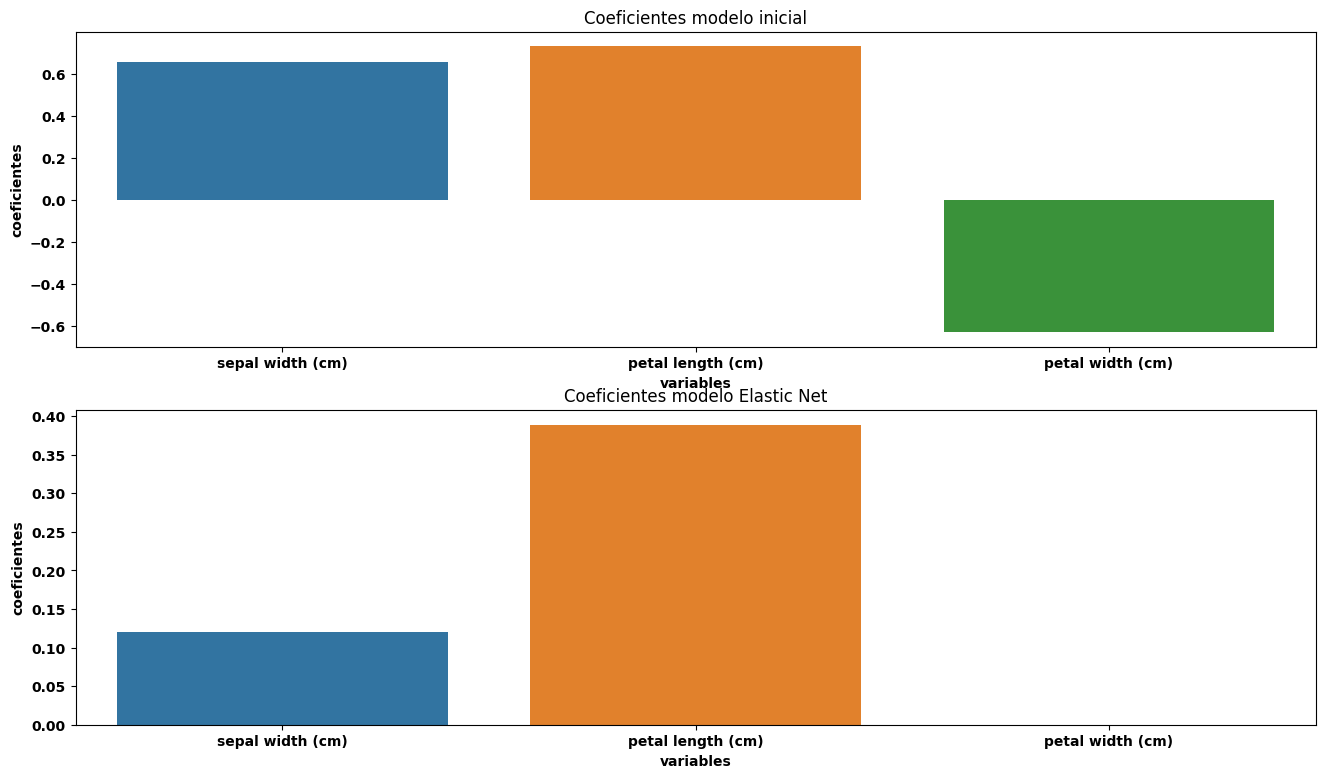

In [ ]:
# Visualizamos los coeficientes del modelo
df_coef_elastic_ir = pd.DataFrame(X_iris.columns, columns=['variables'])
df_coef_elastic_ir['coeficientes'] = Elastic_reg_ir.coef_

fig, axes = plt.subplots(2, 1, figsize=(16,9))
sns.barplot(x=df_coef_ir['variables'], y=df_coef_ir['coeficientes'], ax=axes[0])
axes[0].set_title("Coeficientes modelo inicial")

sns.barplot(x=df_coef_elastic_ir['variables'], y=df_coef_elastic_ir['coeficientes'], ax=axes[1])
axes[1].set_title("Coeficientes modelo Elastic Net")
plt.show()

Se puede apreciar que este nuevo modelo tiene un predictor menos que el modelo original, y el resto de los coeficientes más pequeños.

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Métricas para evaluar la calidad del modelo
print('Mean Absolute Error:', mean_absolute_error(y_test_ir, y_pred_elastic_ir))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test_ir, y_pred_elastic_ir)*100)
print('Mean Squared Error:', mean_squared_error(y_test_ir, y_pred_elastic_ir))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test_ir, y_pred_elastic_ir)))
print('R^2 coefficient of determination:', r2_score(y_test_ir, y_pred_elastic_ir))

Mean Absolute Error: 0.34508228171040944
Mean Absolute Percentage Error: 5.9839353016359125
Mean Squared Error: 0.1801264682382367
Mean Root Squared Error: 0.42441308678955303
R^2 coefficient of determination: 0.7911711318587158


Los resultados de este modelo parecen relativamente aceptables. En un principio son bastante mejores que el modelo L1 y por otra parte ligeramente inferiores respecto al modelo L2.

---

### **`Ejercicio 7.2`**

Realiza una busqueda en estos rangos indicados con el método `ElasticNetCV` y sigue los siguientes puntos:

- $\alpha$:  valores entre `0.2` y `0.5` con pasos de una centésima.
- $l1_{ratio}$:  valores igual a `0.9`, `0.95`, `0.99` y `1`

**`7.2.1`** Construye un modelo tipo regresión lineal múltiple con los hiperparámetros resultantes.  
**`7.2.2`** Visualiza los coeficientes del modelo y comparalos con los coeficientes correspondientes al modelo original (primer modelo sin regularización).  
**`7.2.3`** Calcula diferentes métricas para evaluar tu modelo y analiza su rendimiendo en comparación con modelos anteriores.
- MAE
- MAPE
- MSE
- RMSE
- $R^2$  
  
Explica si este modelo tiene preferencia o no, para ser elegido en práctica como predictor de largos de sépalos en (cm) comparando con otros modelos.

In [ ]:
## Solución
# Ejercicio 7.2.1
#Construimos el modelo con  los hiperparametros resultantes
Elastic_reg_cv_72 = ElasticNetCV(alphas=np.arange(0.2, 0.5, 0.01),
                              l1_ratio=[.9, .95, .99, 1],
                              cv=10,
                              random_state=123)
Elastic_reg_cv_72.fit(X_train_ir, y_train_ir)
alphaOptimo_72=Elastic_reg_cv_72.alpha_
l1Optimo_72=Elastic_reg_cv_72.l1_ratio_
y_pred_elastic_cv_72 = Elastic_reg_cv_72.predict(X_test_ir)

print("EL valor optimo de alpha es: ",alphaOptimo_72 )
print("El valor optimo de l1ratio es:",l1Optimo_72)

Elastic_reg_cv_72.fit(X_train_ir, y_train_ir)
y_pred_elastic_72=Elastic_reg_cv_72.predict(X_test_ir)


EL valor optimo de alpha es:  0.2
El valor optimo de l1ratio es: 0.9


DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE

 Valor de las pendientes o coeficientes "a":
[0.         0.33579223 0.        ]

 Valor de la intersección o coeficiente "b":
4.57808153763505


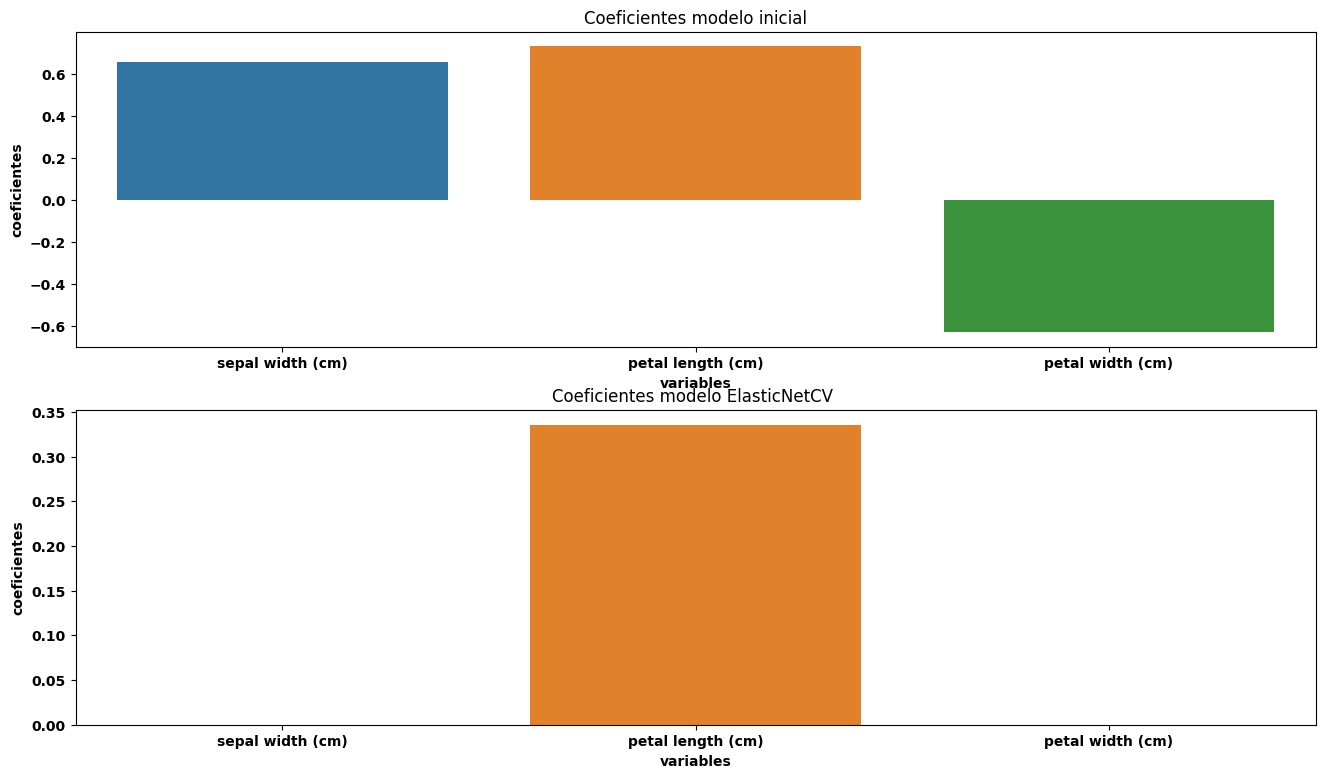

In [ ]:
## Solución
# Ejercicio 7.2.2
print('DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE')
print('\n', 'Valor de las pendientes o coeficientes "a":')
print(Elastic_reg_cv_72.coef_)
print('\n', 'Valor de la intersección o coeficiente "b":')
print(Elastic_reg_cv_72.intercept_)
#visualizamos coeficientes del modelo ELASTICNETCV

df_coef_elastic_ir_72 = pd.DataFrame(X_iris.columns, columns=['variables'])
df_coef_elastic_ir_72['coeficientes'] = Elastic_reg_cv_72.coef_
df_coef_ir['coeficientes'] = lr_iris.coef_
fig, axes = plt.subplots(2, 1, figsize=(16,9))

axes[0].set_title("Coeficientes modelo inicial")
sns.barplot(x=df_coef_ir['variables'], y=df_coef_ir['coeficientes'],ax=axes[0])

sns.barplot(x=df_coef_elastic_ir_72['variables'], y=df_coef_elastic_ir_72['coeficientes'], ax=axes[1])
axes[1].set_title("Coeficientes modelo ElasticNetCV ")
plt.show()


plt.show()


In [ ]:
## Solución
# Ejercicio 7.2.3

# Métricas para evaluar la calidad del modelo construido con ElasticNetCV
print('METRICAS MODELO ELASTICNETCV')
print('Mean Absolute Error:', mean_absolute_error(y_test_ir, y_pred_elastic_cv_72))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test_ir, y_pred_elastic_cv_72)*100)
print('Mean Squared Error:', mean_squared_error(y_test_ir, y_pred_elastic_cv_72))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test_ir, y_pred_elastic_cv_72)))
print('R^2 coefficient of determination:', r2_score(y_test_ir, y_pred_elastic_cv_72))

# Métricas para evaluar la calidad del modelo construido con ElasticNet
print('\nMETRICAS MODELO ELASTICNET')
print('Mean Absolute Error:', mean_absolute_error(y_test_ir, y_pred_elastic_ir))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test_ir, y_pred_elastic_ir)*100)
print('Mean Squared Error:', mean_squared_error(y_test_ir, y_pred_elastic_ir))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test_ir, y_pred_elastic_ir)))
print('R^2 coefficient of determination:', r2_score(y_test_ir, y_pred_elastic_ir))
# Métricas para evaluar la calidad del modelo construido con Ridge
print('\nMETRICAS MODELO RIDGE')
print('Mean Absolute Error:', mean_absolute_error(y_test_ir, y_pred_l2_ir))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test_ir, y_pred_l2_ir)*100)
print('Mean Squared Error:', mean_squared_error(y_test_ir, y_pred_l2_ir))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test_ir, y_pred_l2_ir)))
print('R^2 coefficient of determination:', r2_score(y_test_ir, y_pred_l2_ir))
# Métricas para evaluar la calidad del modelo construido con Lasso
print('\nMETRICAS MODELO LASSO')
print('Mean Absolute Error:', mean_absolute_error(y_test_ir, y_pred_l1_ir))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test_ir, y_pred_l1_ir)*100)
print('Mean Squared Error:', mean_squared_error(y_test_ir, y_pred_l1_ir))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test_ir, y_pred_l1_ir)))
print('R^2 coefficient of determination:', r2_score(y_test_ir, y_pred_l1_ir))

'Comparando las metricas de diferentes modelos podemos decir que nuestro modelo no podria tener preferencia ya que tiene un porcentage absoluto de error mayor que los modelos construidos con elasticnet y ridge,aunque si que tiene preferencia respecto a modelos construidos con Lasso'




METRICAS MODELO ELASTICNETCV
Mean Absolute Error: 0.3721617723541339
Mean Absolute Percentage Error: 6.466868687732016
Mean Squared Error: 0.22921108678821786
Mean Root Squared Error: 0.4787599469339701
R^2 coefficient of determination: 0.7342650844843668

METRICAS MODELO ELASTICNET
Mean Absolute Error: 0.34508228171040944
Mean Absolute Percentage Error: 5.9839353016359125
Mean Squared Error: 0.1801264682382367
Mean Root Squared Error: 0.42441308678955303
R^2 coefficient of determination: 0.7911711318587158

METRICAS MODELO RIDGE
Mean Absolute Error: 0.28388765658567483
Mean Absolute Percentage Error: 4.9645443573366626
Mean Squared Error: 0.1177109399155002
Mean Root Squared Error: 0.34309027954096893
R^2 coefficient of determination: 0.8635323137636329

METRICAS MODELO LASSO
Mean Absolute Error: 0.6849294562362616
Mean Absolute Percentage Error: 12.09618277305041
Mean Squared Error: 0.7026378774991608
Mean Root Squared Error: 0.8382349774968597
R^2 coefficient of determination: 0.185

'Comparando las metricas de diferentes modelos podemos decir que nuestro modelo no podria tener preferencia ya que tiene un porcentage absoluto de error mayor que los modelos construidos con elasticnet y ridge,aunque si que tiene preferencia respecto a modelos construidos con Lasso'